### `TP - COMPUTACIÓN CIENTIFICA ACTUARIAL 1C 2022.

### `Objetivo:`
- Implementar las técnicas aprendidas como parte del curso.

### `Data information`

- TRIPS
    1. Request id: un identificador único de la solicitud
    2. Time of request: La fecha y hora en que el cliente realizó la solicitud de viaje
    3. Drop-off time: La fecha y hora de regreso, en caso de que el viaje se haya completado
    4. Pick-up point: El punto desde el que se realizó la solicitud
    5. Driver id: el número de identificación único del conductor
    6. Status of the request: el estado final del viaje puede ser completado, cancelado por el conductor o no hay autos disponibles
    
   
- DRIVERS
    1. Driver id: identificador de conductor/a.
    2. Name: Nombre del conductor/a.
    3. Gender: Género del conductor/a.
    
### `Objetivos de aprendizaje.:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Realizar comentarios acerca de los insights que van encontrando en la data será tenido en cuenta a la hora de corregir el TP.:`

## Grupo 16 
### Miembros: 
- Gustavo Chac 
- Francisco Piccione 
- Luciano Bustamante

### Importar Librerias

Librerias: Pandas, Numpy, matplotlib, seaborn.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

### Leer datasets

**Trips**

In [70]:
trips = pd.read_csv('trips.csv')

**Drivers**

*Leer dataset con el parametro delimiter=";"*

In [71]:
drivers = pd.read_csv('drivers.csv', sep= ';')

### 1. Sanity check de los datos.

#### 1.1 Inspeccionar datasets con head()

In [72]:
trips.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [73]:
drivers.head()

,Driver id,Name,Gender
0,"1,00",Nakita Atherton,F
1,"2,00",Lynsey Clegg,F
2,"3,00",Rohit Meyer,M
3,"4,00",Gabriela Mathis,F
4,"5,00",Tomas Sanford,M


#### 1.2 Chequear shape de datasets

Utilizar print statements avanzados para que quede un output del estilo:

"El dataset correspondiente a trips tiene la forma:    ; y el dataset drivers tiene la forma:    ..."

In [74]:
print(f'El dataset trips tiene {trips.shape[0]} filas y {trips.shape[1]}')
print(f'El date set de drivers tiene {drivers.shape[0]} filas y {drivers.shape[1]} ')

El dataset trips tiene 6745 filas y 6
El date set de drivers tiene 300 filas y 3 


#### 1.3 Inspeccionar columnas y dtypes.

Imprimir columnas de cada dataset.

In [75]:
trips.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [76]:
drivers.columns

Index(['Driver id', 'Name', 'Gender'], dtype='object')

### 2. Joinear ambas bases para continuar con el chequeo de valores nulos. 

Utilizar la funcion merge de pandas y llamar al nuevo dataframe df_final. La idea es usar el dataframe trips como table madre, y traer la información de los drivers del dataframe de conduntores/as.

**No debemos perder datos de la tabla de trips.**

**Pista:** Las variables para joinear, son del mismo dtype? En caso que no lo sean, conviertan la columna en el mismo dtype que el dataset madre para que funcione el merge. 

**2.1 Modificar la columna Driver id del dataset de drivers a float**

Vemos que en la columna Driver id del dataset de drivers, tenemos una ",", la cual no nos va a permitir convertir el string a float.

1. Cambiar la coma por . utilizando .replace() sobre la columna Driver id
2. Modificar el dtype de la columna y pasarlo a float.

In [77]:
#modifico las comas por los puntos
drivers['Driver id']= drivers['Driver id'].str.replace(',','.')

In [78]:
#cambiamos el tipo de dato de un string a un float
drivers['Driver id']=drivers['Driver id'].astype(float)
drivers.info('Driver id') #chequeamos que fue convertio a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Driver id  300 non-null    float64
 1   Name       300 non-null    object 
 2   Gender     300 non-null    object 
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


**2.2 Joinear datasets y obtener el df_final**

#####  cantidad de drivers que hay en la tabla de trips:


In [79]:
len(trips['Driver id'].unique())
#hay 301 empleados drivers mientras que en la cantidad de drivers registrados con id hay 300,  vemos cual es el motivo

301

#####  Imprimimos todos los valores diferentes que hay en la columna del driver id:

In [80]:
trips['Driver id'].unique() #hay un driver id que tiene el campo vacio..

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [81]:
#si hacemos un inner join, vamos a perder ese dato vacio ya que tomara los id que estan en ambos, usaremos un left 
# join para incluir ese registro.
df_final= trips.merge(drivers, how='left')

**2.3 Chequear shape del dataset madre y el dataset nuevo**

Debemos tener la misma cantidad de filas para asegurarnos que el merge se hizo correctamente.

In [82]:
#chequeamos que tenga la misma cantidad de filas:
len(trips)==len(df_final)

True

### 3. Analizar valores nulos del dataset mergeado.

##### Primero para saber la cantidad de nulos que hay y poder analizarlos el por qué de ellos veremos la cantidad de cada uno de sus columnas y ver el caso a caso

In [83]:
columnas=df_final.columns
for i in columnas:
    print(f'Cantidad de nulos que tiene {i}:', len(df_final[df_final[f'{i}'].isna()]))


Cantidad de nulos que tiene Request id: 0
Cantidad de nulos que tiene Pickup point: 0
Cantidad de nulos que tiene Driver id: 2650
Cantidad de nulos que tiene Status: 0
Cantidad de nulos que tiene Request timestamp: 0
Cantidad de nulos que tiene Drop timestamp: 3914
Cantidad de nulos que tiene Name: 2650
Cantidad de nulos que tiene Gender: 2650


Comprobamos que cuando el driver id esta vacio, en el mismo registro, tambien lo está el campo del nombre y el genero del conductor. 

In [84]:
print(len(df_final[(df_final['Driver id'].isna()) & (df_final['Name'].isna())])) 
print(len(df_final[(df_final['Gender'].isna()) & (df_final['Name'].isna())]))
print(len(df_final[(df_final['Gender'].isna()) & (df_final['Driver id'].isna())]))
#coinciden en la cantidad de veces que aparecen nulos o campos vacios en su conjunto y por seprado

2650
2650
2650


### 4. Analizar valores unicos para las distintas variables

**4.1 Variables categoricas**

- Realizar este procedimiento solo para las columnas Pickup point y Status. Usar print avanzado con .format().

In [85]:
valores=df_final['Status'].value_counts() #suma nulos en Drop timestamp es igual a la suma de status: 'Cancelled' y 'No
#Cars Available'
valores

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [86]:
(valores[1]+ valores[2])==len(df_final[df_final['Drop timestamp'].isna()])

True

Vemos si la cantidad de registros en driver id con vacios, tienen el mismo starus de 'No Cars Available':

In [87]:
df_final[df_final['Driver id'].isna()].value_counts('Status') #confirmamos que la razon por la que no hay 
#Autos que haga el reparto es por la no disponibilidad de autos. 

Status
No Cars Available    2650
dtype: int64

### 5. Feature engineering

#### 5.1 Corregir las columnas request timestamp y drop timestamp.

*Observemos que en request timestamp, tenemos algunas fechas separadas con "/" y otras separadas con "-". 
Estandarizemos dicho problema y dejemos solo "/" tanto para las columnas request timestamp y drop timestamp.

In [88]:
df_final['Drop timestamp']=df_final['Drop timestamp'].str.replace('-','/')
df_final['Request timestamp']=df_final['Request timestamp'].str.replace('-','/')

**5.2 Convertir las columnas request timestamp y drop timestamp en formato datetime**

In [89]:
df_final['Drop timestamp']=pd.to_datetime(df_final['Drop timestamp'])
df_final['Request timestamp']=pd.to_datetime(df_final['Request timestamp'])

In [92]:
df_final #si bien se remplazo por las fechas - por /, cuando lo paso a fecha queda -

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Name,Gender
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Nakita Atherton,F
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Nakita Atherton,F
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Nakita Atherton,F
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Nakita Atherton,F
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Nakita Atherton,F
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,NaN,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,NaN,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,NaN,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,NaN,NaN


**5.3 Crear las columnas year, month y hour para cada columna datetime**

La idea es tener una columna que sea "request_**col**" y "drop_**col**"; siendo **col**: {year, month, hour}.

In [93]:
from datetime import datetime

**Year**

#### Primero creamos listas vacias para ir agregando a la la misma al año/mes/dia que se van calculando en el bucle para luego asignarle a una nueva columna de df_final

In [94]:
year_request=[]
year_drop=[]
for i in range(len(df_final)):
    year_request.append(df_final['Request timestamp'][i].strftime('%Y'))
    try:
        year_drop.append(df_final['Drop timestamp'][i].strftime('%Y')) #creado con el fin de solucionar el error de no transformar el campo vacio en una fecha
    except Exception :
        year_drop.append('NaN')

df_final['year_request']=year_request        
df_final['year_drop']=year_drop

**Month** 

In [95]:
month_request=[]
month_drop=[]
for i in range(len(df_final)):
    month_request.append(df_final['Request timestamp'][i].strftime('%B'))
    try:
        month_drop.append(df_final['Drop timestamp'][i].strftime('%B'))
    except :
        month_drop.append('NaN')
df_final['month_request']=month_request
df_final['month_drop']=month_drop

**Hour**

In [96]:
hour_request=[]
hour_drop=[]
for i in range(len(df_final)):
    hour_request.append(int(df_final['Request timestamp'][i].strftime('%H')))
    try:
        hour_drop.append(int(df_final['Drop timestamp'][i].strftime('%H')))
    except :
        hour_drop.append(0)
df_final['hour_request']=hour_request
df_final['hour_drop']=hour_drop

### 6. Duración de los viajes.

Chequear la duración de los viajes calculando la diferencia entre las columnas request_timestamp_corrected y drop_timestamp_corrected.

Lastly what I will do is check if the duration of the trips are coherent or not. By coherent I mean that we have some "NORMAL" duration of trips. If I found some trip that lasted more than 8 hs or it's negative, it should be considered an outlier or maybe an error of the data. That is the purpose of this task.

The duration will be calculated in mins and using the columns request_timestamp_corrected and drop_timestamp_corrected.

**Ayuda:** Para obtenerlo en minutos, debemos usar la siguiente sintaxis. 

```df_final["trip_duration_mins"] = (df_final["drop_timestamp_corrected"] - df_final["request_timestamp_corrected"]).astype('timedelta64[m]').astype("float")```


**6.1 Crear la columna "trip_duration_mins" con lo comentado arriba**.

In [97]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6745 entries, 0 to 6744
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
 6   Name               4095 non-null   object        
 7   Gender             4095 non-null   object        
 8   year_request       6745 non-null   object        
 9   year_drop          6745 non-null   object        
 10  month_request      6745 non-null   object        
 11  month_drop         6745 non-null   object        
 12  hour_request       6745 non-null   int64         
 13  hour_drop          6745 non-null   int64         
dtypes: datet

In [101]:
df_final["trip_duration_mins"] = (df_final["Drop timestamp"] - df_final["Request timestamp"]).astype('timedelta64[m]').astype("float")

**6.2 Realizar un sanity check sobre las duraciones**

- Chequear distirbucin utilizando .describe()
- Plotear un boxplot y un histograma.

**Tener en cuenta de realizar el describe solo para la columna trip_duration_mins, donde esa columna NO es nula**

**Describe()**

In [138]:
df_final[df_final['trip_duration_mins'].notna()].trip_duration_mins.describe()

count      2831.000000
mean       -646.263158
std       14827.877457
min     -213087.000000
25%          41.000000
50%          52.000000
75%          64.000000
max       41835.000000
Name: trip_duration_mins, dtype: float64

**Boxplot**

In [9]:
sns.boxplot(data=df_final, x='trip_duration_mins')

NameError: ignored

**Histograma**

In [8]:
sns.histplot(data=df_final, x='trip_duration_mins')

NameError: ignored

Se ve raro no? Si observamos el describe y el histograma, vemos que tenemos valores concentrados cercanos entre 0 y 100 aproximadamente, y algunos valores extraños (outliers).

**6.3 Topear la columna trip_duration_mins**

Aquellos valores mayores a 83 en la columna trip_duration_mins deben ser topeados en 83; y aquellos valores menores a 5 minutos, deben ser topeados en 5.

**Nota:** El motivo real por el que sucede esto es porque algunas entradas de datos estan erroneas. El problema es que hay ciertos registros de fecha que estan al revés, en donde el mes esta como el día y viceversa. La solución de este problema no será requerida en este trabajo, pero en caso que esten interesados en ver cómo solucionamos este tema, nos pueden escribir y les enviamos la solución. **Por el momento, solo topeen los valores como se menciona en la consigna**.

In [105]:
df_topeado=df_final[(df_final['trip_duration_mins']>5) & (df_final['trip_duration_mins']<83)]

Chequear nuevamente la distribución graficando el boxplot.

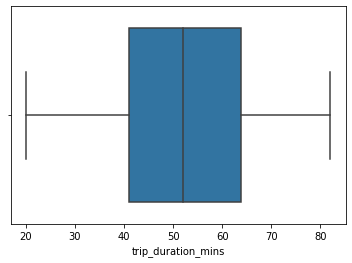

In [106]:
sns.boxplot(data=df_topeado, x='trip_duration_mins')

### 7. Crear nueva columna "part_of_the_day" basandonos en la columna hora.


Rangos a crear:
- Morning: de 6 AM a 11 AM.
- Mi-day: de 12 a 14.
- Afternoon: de 15 a 17.
- Evening: de 18 a 21.
- Night: de 21 PM a 5 AM.

**Recomendación: Pueden usar la columna "request_hour" para crear dichas categorias en la nueva columna.**

**Pista:** Usar la funcion pd.cut con el siguiente formato:
```df_final["part_of_the_day"] = pd.cut(columna_hora,
[[0, 5, 11, 14, 17, 21, 24],
labels = [Categorias correspondientes a cada bucket ("night", "morning", ...,
right=True,
include_lowest=True)
```

Tener en cuenta que probablemente deban crear 2 categorias de night y luego reemplazarlas ya que sino no van a poder realizar los cortes.

In [107]:
# en bins se pone la division, desde 0 hasta la siguiente divsion 
bins =[0,5,11,14,17,21,24]
labels = ["Night","Morning","Mi-day","Afternoon","Evening","Night"]


# CREO LA COLUMNA NUEVA 
df_final["part_of_the_day"] = pd.cut(df_final["hour_request"],  bins=bins, labels=labels ,
include_lowest=True, right = True ,ordered=False)

In [108]:
df_final

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Name,Gender,year_request,year_drop,month_request,month_drop,hour_request,hour_drop,trip_duration_mins,part_of_the_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Nakita Atherton,F,2016,2016,November,November,11,13,69.0,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Nakita Atherton,F,2016,2016,November,November,17,18,50.0,Afternoon
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Nakita Atherton,F,2016,2016,December,December,9,9,41.0,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Nakita Atherton,F,2016,2016,December,December,21,22,55.0,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Nakita Atherton,F,2016,2016,July,July,8,9,52.0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,NaN,NaN,2016,NaN,July,NaN,23,0,NaN,Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,NaN,NaN,2016,NaN,July,NaN,23,0,NaN,Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,NaN,NaN,2016,NaN,July,NaN,23,0,NaN,Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,NaN,NaN,2016,NaN,July,NaN,23,0,NaN,Night



**7.1 Chequear con un groupby o un pivot_table los valores máximos y minimos de la columna request_hour, agrupando por la columna part_of_the_day**

In [109]:
#calculo del minimo
df_group_max=df_final[['part_of_the_day','hour_request']].groupby(["part_of_the_day"]).max('hour_request')
print('-----Maximo-----')
print(df_group_max)
df_group_min=df_final[['part_of_the_day','hour_request']].groupby(["part_of_the_day"]).min('hour_request')
print('-----Minimo-----')
print(df_group_min)

-----Maximo-----
                 hour_request
part_of_the_day              
Afternoon                  17
Evening                    21
Mi-day                     14
Morning                    11
Night                      23
-----Minimo-----
                 hour_request
part_of_the_day              
Afternoon                  15
Evening                    18
Mi-day                     12
Morning                     6
Night                       0


### 8. Análisis Exploratorio de datos

#### 8.1. Analizar las horas más populares en que los viajes son solicitados (no importa el status de request o trip).

**Graficar:**

Pueden usar sns.countplot() tanto para la columna part_of_the_day o request_hour.

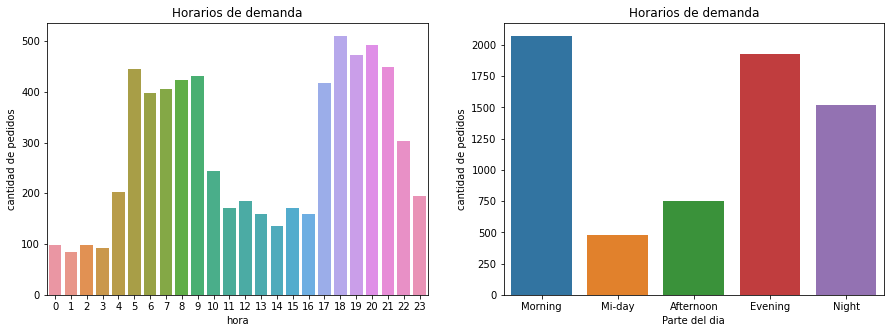

In [135]:
plt.figure(figsize=(15,5))
plt.subplot(121) 
sns.countplot(x='hour_request', data=df_final)
plt.xlabel('hora')
plt.ylabel('cantidad de pedidos')
plt.title('Horarios de demanda')

plt.subplot(122) 
sns.countplot(x='part_of_the_day', data=df_final, order=['Morning','Mi-day','Afternoon','Evening','Night'])
plt.xlabel('Parte del dia')
plt.ylabel('cantidad de pedidos')
plt.title('Horarios de demanda')

plt.show()

**Insighs**

Los horarios de mayor demanda se encuentran en la mañana y en la tarde-noche, es importante destacar que el horario nocturno tiene sus picos en el inicio y el final, siendo la madrugada el horario con menos demada.

Los horarios de mayor demanda se encuentran en la mañana y en la tarde-noche

### 8.2. Distribución del estado de todos los viajes.

Analizar la distribución de la columna "Status".

**Graficar un barplot y calcular utilizando la value_counts() sobre la columna**

**Barplot**

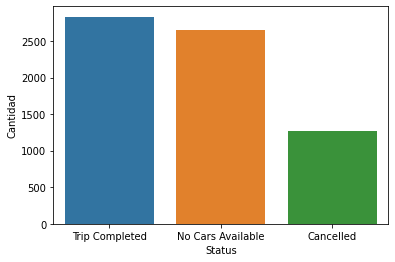

In [112]:
# MODIFICO DF PARA OBTENER EL BARPLOT USANDO VALUE_COUNTS
data_graf2 = pd.DataFrame(df_final['Status'].value_counts())
data_graf2.rename(columns={'Status': 'Cantidad'}, inplace = True)
data_graf2['Status'] = data_graf2.index
data_graf2 = data_graf2.reset_index(drop=True)

# GENERO GRAFICO
sns.barplot(x='Status', y='Cantidad', data= data_graf2)

**Value_counts**

In [113]:
df_final['Status'].value_counts()   

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

**Insights**

Es importante señalar que los viajes completados son menos de la mitad, y tomando como viajes no completados la suma de Cancelados y No disponibilidad de Autos existe un gran demanda que no se esta satisfaciendo, es decir, potencialmente podriamos duplicar los viajes completados si generamos la oferta suficiente. 

### 8.3.  Distribucion de viajes (trips) por parte del dia y status.

El proposito de este grafico es chequear la demanda de viajes por hora del dia, y chequear el status de esos viajes, para chequear donde tenemos problemas.

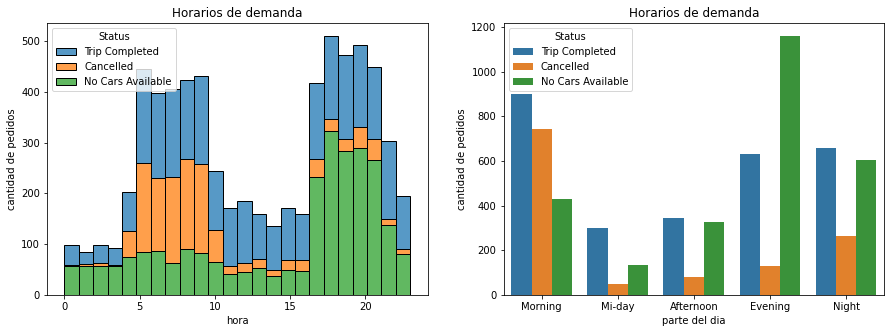

In [124]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(x='hour_request', data=df_final, hue='Status',multiple='stack', bins=24)
plt.xlabel('hora')
plt.ylabel('cantidad de pedidos')
plt.title('Horarios de demanda')

plt.subplot(122)
sns.countplot(data=df_final, x='part_of_the_day', hue= 'Status', order=['Morning','Mi-day','Afternoon','Evening','Night'])
plt.xlabel('parte del dia')
plt.ylabel('cantidad de pedidos')
plt.title('Horarios de demanda')

plt.show()

**Insights**

Para la ventana de tiempo dada dejamos de realizar al menos 50 viajes en cada horario y en la tarde noche es donde tenemos el mayor deficit en la oferta de autos disponibles. Es necesario preparar la oferta para satisfacer la demanda haciendo foco en el horario de 17 a 23. Con respecto a las cancelaciones debemos pasar por una etapa de entendimiento del porqué se generan para disminuir aquellas que se relacionan a nuestro servicio. 

### 8.4 Distribucion de pick up point por parte del dia.

La idea es obtener un por parte del dia, como se distribuyen los viajes respecto al pickup point.

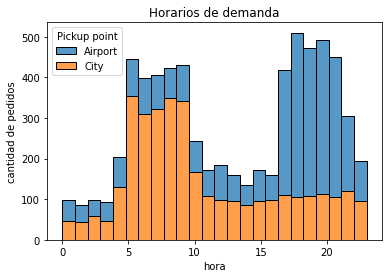

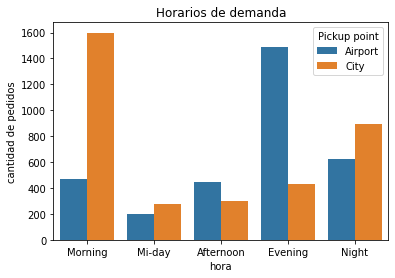

In [131]:
graf41 = sns.histplot(x='hour_request', data=df_final, hue='Pickup point',multiple='stack', bins=24)
plt.xlabel('hora')
plt.ylabel('cantidad de pedidos')
plt.title('Horarios de demanda')

plt.show()

graf42 = sns.countplot(x='part_of_the_day', data=df_final, hue='Pickup point', order=['Morning','Mi-day','Afternoon','Evening','Night'])
plt.xlabel('hora')
plt.ylabel('cantidad de pedidos')
plt.title('Horarios de demanda')

plt.show()



**Insights**

La ciudad posee una mayor demanda en la mañana y el aereopuerto en la noche, debemos prepararnos logisticamente para poder tener la disponibilidad de abordar la mayor cantidad de viajes a la ciudad en la mañana y la mayor cantidad de viajes al aereopuerto en la tarde-noche.

### 8.5  Obtener el top 10 de conductores con mayores viajes.

El output esperado es el nombre de los 10 conductores con más viajes, junto a la cantidad de viajes de cada uno.

In [132]:
df_final['Name'].value_counts().head(10)

Aston Hooper        22
Yousuf Haas         21
Bridget Roberson    21
Sharon Ahmed        21
Angelo Castillo     21
Harlan Cross        21
Kelvin Malone       20
Thiago Pitts        20
Rachael Haynes      20
Allen Hammond       20
Name: Name, dtype: int64

### 8.6  Obtener la distribución por genero

- Qué genero es más popular entre los conductores?
- Obtener la parte del dia más popular para el género femenino.

**Distribución de géneros**

Usar value_counts y tener en cuenta dropna.

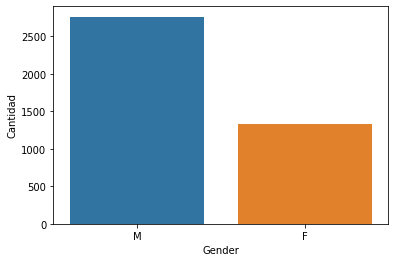

In [133]:
data_graf6 = pd.DataFrame(df_final['Gender'].value_counts())
data_graf6.rename(columns={'Gender': 'Cantidad'}, inplace = True)
data_graf6['Gender'] = data_graf6.index
data_graf6 = data_graf6.reset_index(drop=True)

# GENERO GRAFICO
sns.barplot(x='Gender', y='Cantidad', data= data_graf6)

**Parte del dia más popular para el genero femenino**

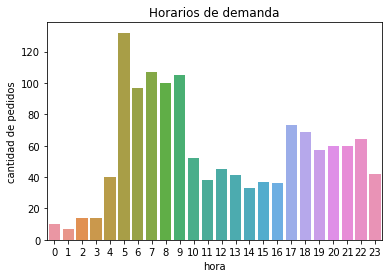

In [134]:
graf7 = sns.countplot(x='hour_request', data=df_final[df_final['Gender'] == 'F'])
plt.xlabel('hora')
plt.ylabel('cantidad de pedidos')
plt.title('Horarios de demanda')
plt.show()